# Generating Sample Data from Distributions
Then treating data as if they were samples of real data

* https://github.com/ijmbarr/causalgraphicalmodels
* https://github.com/ijmbarr/causalgraphicalmodels/blob/master/notebooks/cgm-examples.ipynb
* https://en.wikipedia.org/wiki/Vehicular_metrics

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15, 8)
# mpl.rcParams["figure.dpi"] = dpi
mpl.rc('xtick', labelsize=15) 
mpl.rc('ytick', labelsize=15)

font_size=15
title_font_size=25

In [4]:
import pandas as pd
print(pd.__version__)

1.4.2


In [5]:
from scipy.stats import skewnorm

In [6]:
import seaborn as sns

In [7]:
# !pip install causalgraphicalmodels

In [8]:
# https://github.com/ijmbarr/causalgraphicalmodels
# https://github.com/ijmbarr/causalgraphicalmodels/blob/master/notebooks/cgm-examples.ipynb
from causalgraphicalmodels import StructuralCausalModel

In [9]:
# https://en.wikipedia.org/wiki/Vehicular_metrics

braking_distance_mean = 40
braking_distance_std = 5
power_mean = 100
power_std = 50

car_safety_model = StructuralCausalModel({
    "emergency_breaking": lambda n_samples: np.random.binomial(1, p=0.60, size=n_samples), 
    "braking_distance": lambda n_samples: np.random.normal(loc=braking_distance_mean, scale=braking_distance_std, size=n_samples),
    "power": lambda n_samples: skewnorm.rvs(a=2, loc=power_mean, scale=power_std, size=n_samples),
    "car_safety": \
        lambda emergency_breaking, braking_distance, power, n_samples: \
            np.random.normal(loc=emergency_breaking - \
                             # having a breaking distance below average is negative, so we have to subtract
                             (braking_distance - braking_distance_mean) / braking_distance_std - \
                             # all deviation from good amount of power is negative
                             abs(power - power_mean) / power_std, \
                             scale=0.1)
})

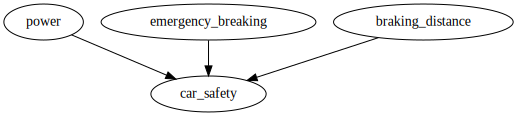

In [10]:
car_safety_model.cgm.draw()

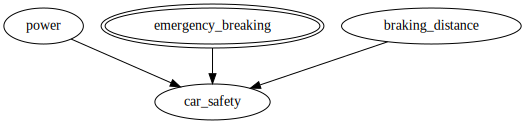

In [11]:
car_safety_model_do_emergency_breaking = car_safety_model.do("emergency_breaking")

car_safety_model_do_emergency_breaking.cgm.draw()

In [12]:
car_safety_model.cgm.get_distribution()

'P(emergency_breaking)P(braking_distance)P(power)P(car_safety|emergency_breaking,braking_distance,power)'

In [13]:
n_samples=10_000
# data = car_safety_model_do_emergency_breaking.sample(n_samples=n_samples, 
#                                                      set_values={"emergency_breaking": np.ones(n_samples)})
data = car_safety_model.sample(n_samples=n_samples)
data.head()

,emergency_breaking,braking_distance,power,car_safety
0,0,35.705998,132.163293,0.206297
1,1,39.422667,165.757138,-0.121467
2,1,37.029604,142.399119,0.630796
3,1,37.066425,138.512244,0.851213
4,0,30.083470,127.458519,1.443691


In [14]:
braking_distance = 31.983544

In [15]:
(braking_distance - braking_distance_mean) / braking_distance_std

-1.6032912000000004

In [16]:
power = 50

In [17]:
abs(power - power_mean) / power_std

1.0

In [18]:
data.describe()

,emergency_breaking,braking_distance,power,car_safety
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.605900,39.957746,135.403104,-0.178858
std,0.488681,4.973773,34.945256,1.267749
min,0.000000,21.810985,18.643261,-5.190500
25%,0.000000,36.593358,110.998850,-1.013865
50%,1.000000,39.942315,132.260291,-0.133733
75%,1.000000,43.340210,157.202897,0.686202
max,1.000000,59.017593,319.324167,4.164273


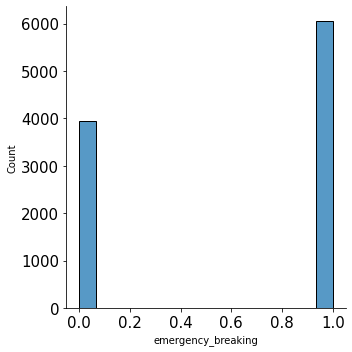

In [19]:
sns.displot(data["emergency_breaking"]);

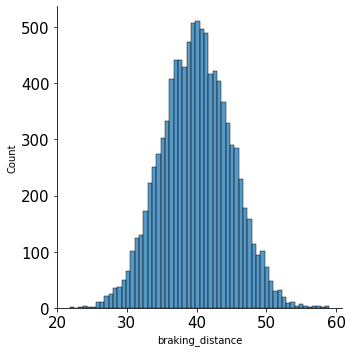

In [20]:
sns.displot(data["braking_distance"]);

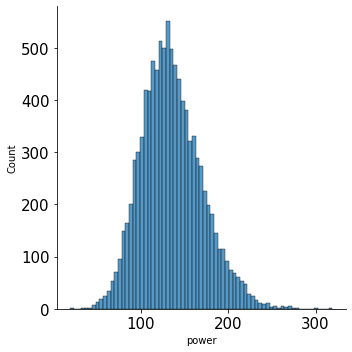

In [21]:
sns.displot(data["power"]);

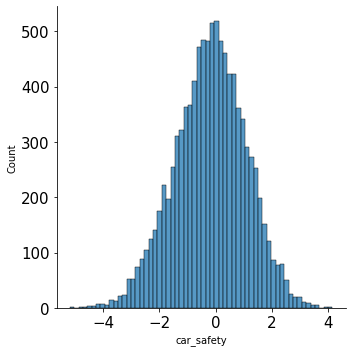

In [22]:
sns.displot(data["car_safety"]);

In [24]:
# sns.kdeplot?

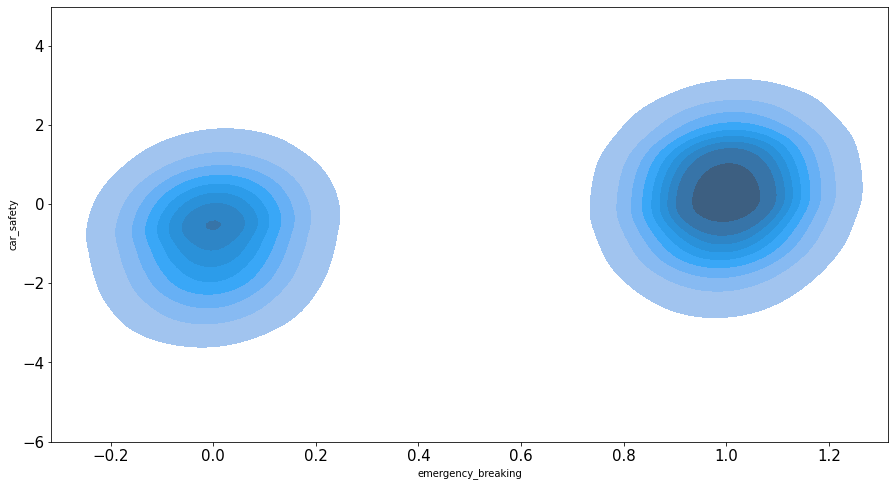

In [25]:
sns.kdeplot(
    data=data["emergency_breaking"],
    data2=data["car_safety"],
    fill=True
);

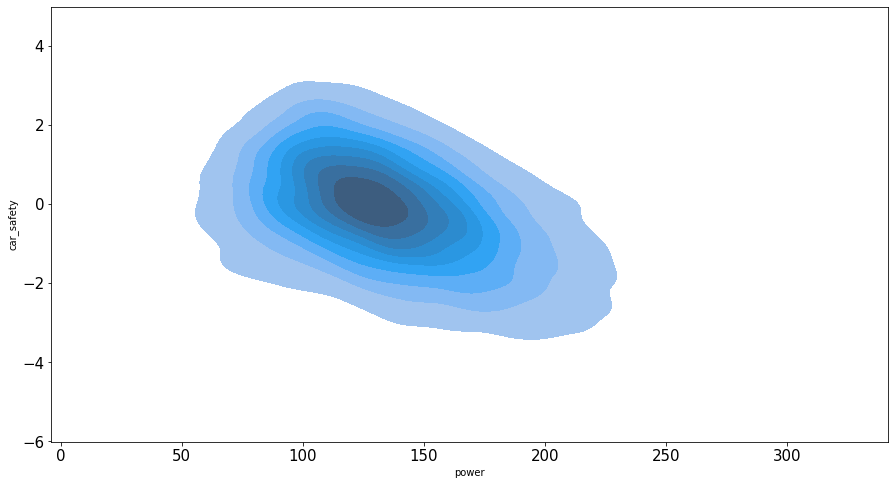

In [26]:
sns.kdeplot(
    data=data["power"],
    data2=data["car_safety"],
    fill=True
);

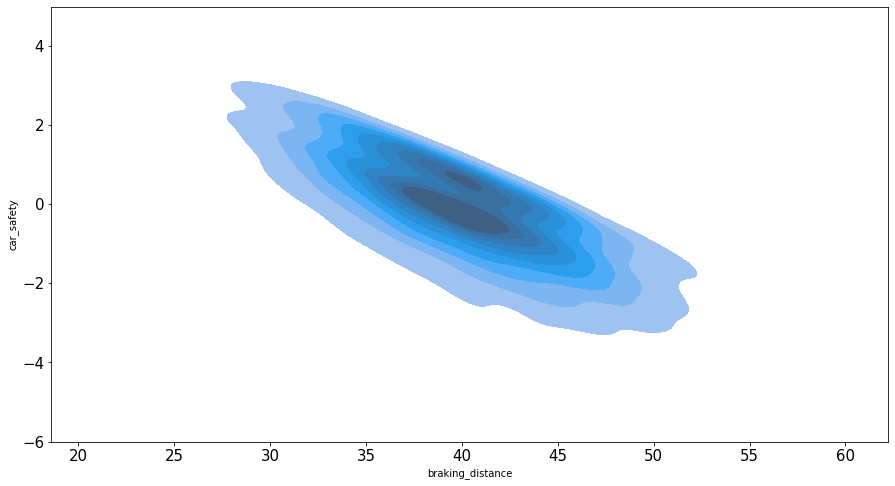

In [27]:
sns.kdeplot(
    data=data["braking_distance"],
    data2=data["car_safety"],
    fill=True
);

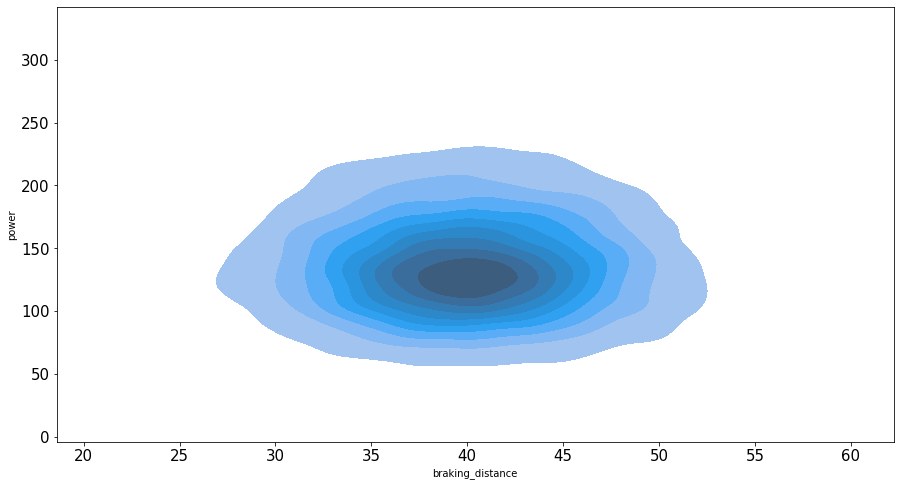

In [28]:
sns.kdeplot(
    data=data["braking_distance"],
    data2=data["power"],
    fill=True
);

In [29]:
from scipy.stats import pearsonr


In [30]:
# pearsonr?

In [31]:
r, p_value = pearsonr(data['braking_distance'], data['power'])
# The p-value roughly indicates the probability of an uncorrelated system
# producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets.
r, p_value

(-0.007117407949359465, 0.4766748256027832)

In [32]:
r, p_value = pearsonr(data['braking_distance'], data['car_safety'])
r, p_value

(-0.7848993283421635, 0.0)

In [33]:
r, p_value = pearsonr(data['power'], data['car_safety'])
r, p_value

(-0.4364760806630149, 0.0)

# Driver's ability

age distribution: https://www.destatis.de/DE/Themen/Gesellschaft-Umwelt/Bevoelkerung/Bevoelkerungsstand/Tabellen/bevoelkerung-altersgruppen-deutschland.html

(16, 100, 34.8656, 13.50863193073229, 10000)

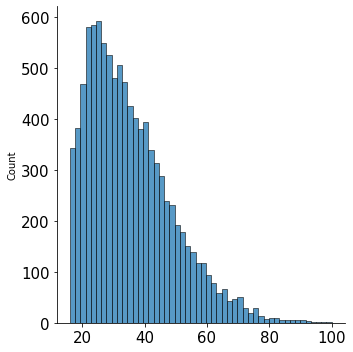

In [34]:
age_mean = 18
age_std = 22

x = skewnorm.rvs(a=8, loc=age_mean, scale=age_std, size=n_samples)
# hard clip leaves us with non constant amout of samples
# x = x[(x > 16) & (x < 100)] 
x = np.clip(x, a_min=16, a_max=100)
sns.displot(x);
x = x.astype(int)
age_skewed_mean = x.mean()
age_skewed_std = x.std()

x.min(), x.max(), age_skewed_mean, age_skewed_std, len(x)

In [35]:
driver_ability_model = StructuralCausalModel({
    "training": lambda n_samples: np.random.binomial(1, p=0.20, size=n_samples), 
    "age": lambda n_samples: skewnorm.rvs(a=16, loc=age_mean, scale=age_std, size=n_samples),
    "driver_ability": \
        lambda training, age, n_samples: 
            np.random.normal(loc=training - \
                             # all deviation from good age is negative
                             # using unskwed mean makes this a bit more balanaced
                             abs(age - age_skewed_mean) / age_std, \
                             scale=0.1)})

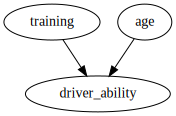

In [36]:
driver_ability_model.cgm.draw()

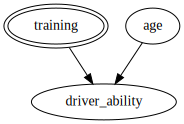

In [37]:
driver_ability_model_with_training = driver_ability_model.do("training")

driver_ability_model_with_training.cgm.draw()

In [38]:
driver_ability_model.cgm.get_distribution()

'P(training)P(age)P(driver_ability|training,age)'

In [39]:
n_samples=10_000
data = driver_ability_model.sample(n_samples=n_samples)
data.head()

,training,age,driver_ability
0,1,27.782015,0.566334
1,0,33.589641,0.047392
2,0,65.027476,-1.333176
3,0,51.116152,-0.674220
4,0,29.176631,-0.074139


In [40]:
age = 80

In [41]:
# abs(age - age_skewed_mean) / age_skewed_std
# more balanced
abs(age - age_skewed_mean) / age_std

2.0515636363636363

In [42]:
data.describe()

,training,age,driver_ability
count,10000.000000,10000.000000,10000.000000
mean,0.196100,35.639382,-0.288727
std,0.397065,13.501819,0.552826
min,0.000000,14.522163,-3.153465
25%,0.000000,25.012406,-0.607098
50%,0.000000,32.847834,-0.334011
75%,0.000000,43.480863,-0.049492
max,1.000000,108.929030,1.334714


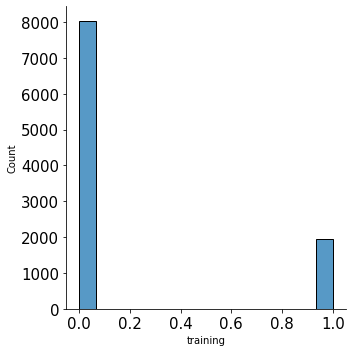

In [43]:
sns.displot(data["training"]);

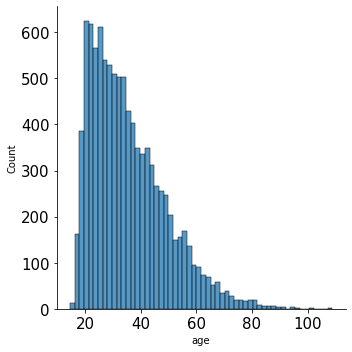

In [44]:
sns.displot(data["age"]);

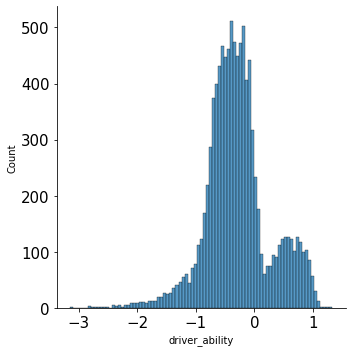

In [45]:
sns.displot(data["driver_ability"]);

In [46]:
# sns.kdeplot?

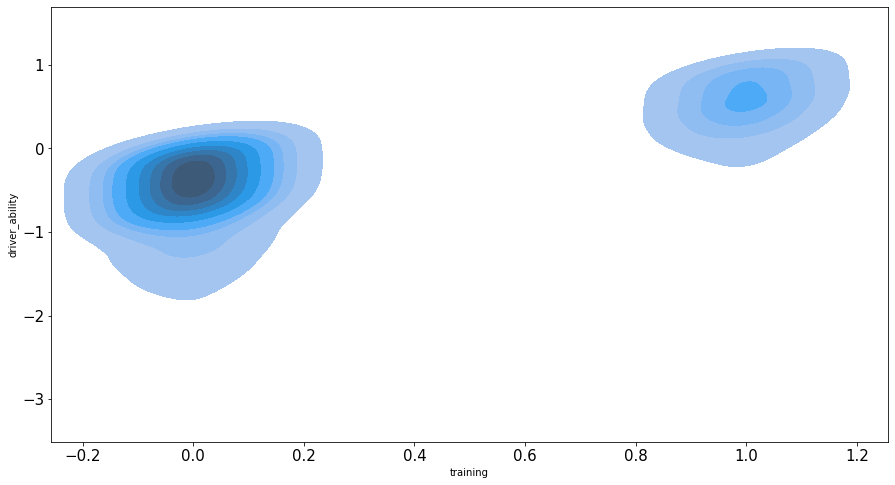

In [47]:
sns.kdeplot(
    data=data["training"],
    data2=data["driver_ability"],
    fill=True
);

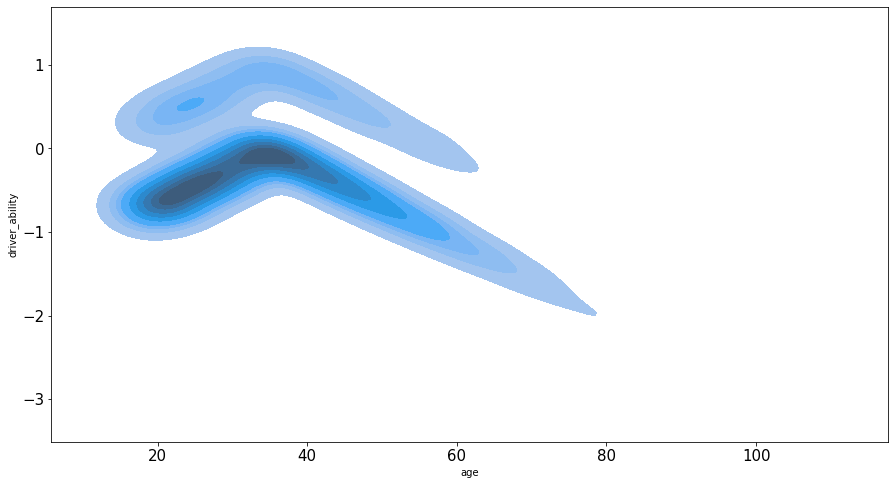

In [48]:
sns.kdeplot(
    data=data["age"],
    data2=data["driver_ability"],
    fill=True
);

In [49]:
r, p_value = pearsonr(data['age'], data['driver_ability'])
r, p_value

(-0.35146968001205137, 1.2473821052556136e-288)

In [50]:
r, p_value = pearsonr(data['training'], data['driver_ability'])
r, p_value

(0.7102869370404786, 0.0)

In [51]:
r, p_value = pearsonr(data['training'], data['age'])
r, p_value

(0.013183982603251224, 0.18740633962704487)

# Combined risk model

In [52]:
from sklearn.preprocessing import normalize

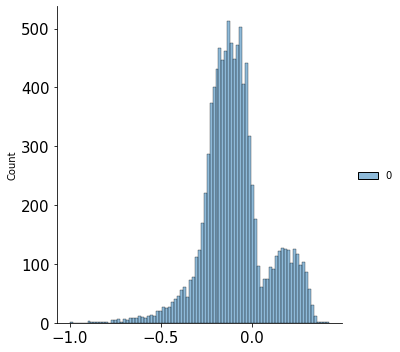

In [53]:
ability = normalize(data['driver_ability'].values.reshape(-1, 1), axis=0, norm='max')
sns.displot(ability);

(2.8836108671625063, 126.57912308083792, 44.29782801455779, 15.827909011550814)

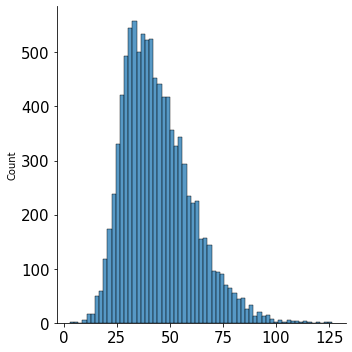

In [55]:
miles_mean = 25
miles_std = 25

x = skewnorm.rvs(a=4, loc=miles_mean, scale=miles_std, size=n_samples)
sns.displot(x);
miles_skewed_mean = x.mean()
miles_skewed_std = x.std()

x.min(), x.max(), miles_skewed_mean, miles_skewed_std

In [56]:
risk_model = StructuralCausalModel({
    "ability": lambda n_samples: driver_ability_model.sample(n_samples=n_samples)['driver_ability'], 
    "safety": lambda n_samples: car_safety_model.sample(n_samples=n_samples)['car_safety'],
    "miles": lambda n_samples: skewnorm.rvs(a=4, loc=miles_mean, scale=miles_std, size=n_samples),
    "risk": \
        lambda ability, safety, miles, n_samples:
                # negative score is high risk
             - np.random.normal(loc=ability + \
                             safety -
                             # all deviation from good miles is negative
                             abs(miles - miles_mean) / miles_std, \
                             scale=0.1)})

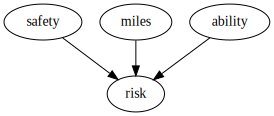

In [57]:
risk_model.cgm.draw()

In [58]:
n_samples=10_000
data = risk_model.sample(n_samples=n_samples)
data.head()

,ability,safety,miles,risk
0,-0.739494,-1.088203,22.943923,2.005404
1,0.586397,-0.225350,40.368035,0.398015
2,-0.102804,-1.952576,27.655266,2.315970
3,-0.374915,-0.218667,74.073803,2.454168
4,0.979434,0.229415,37.450135,-0.652230


In [59]:
data.describe()

,ability,safety,miles,risk
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.281037,-0.212752,44.396195,1.293258
std,0.553252,1.272934,16.186489,1.528881
min,-3.274866,-5.592157,6.640557,-3.970076
25%,-0.597997,-1.070878,32.396817,0.225840
50%,-0.329836,-0.189241,41.706953,1.249008
75%,-0.047909,0.660168,53.900277,2.314387
max,1.219442,4.610553,149.321947,7.210718


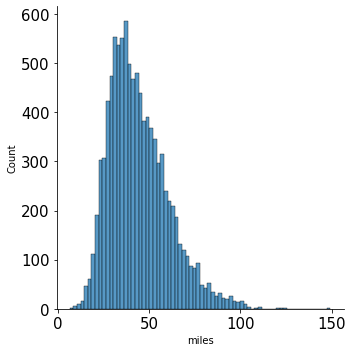

In [60]:
sns.displot(data["miles"]);

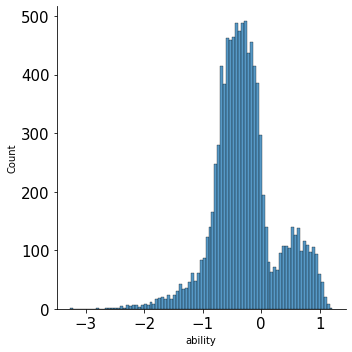

In [61]:
sns.displot(data["ability"]);

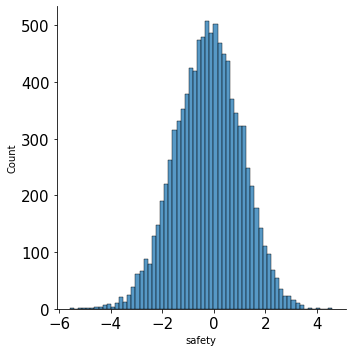

In [62]:
sns.displot(data["safety"]);

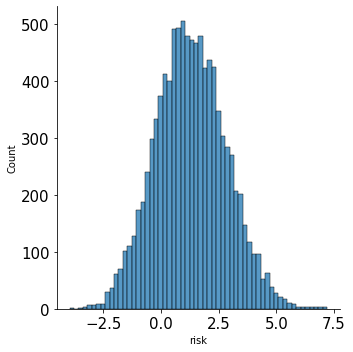

In [63]:
sns.displot(data["risk"]);

In [64]:
# sns.kdeplot?

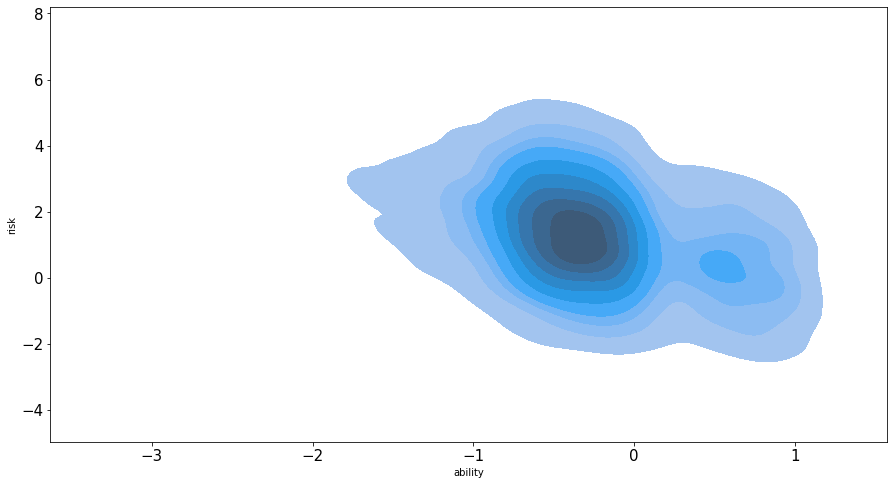

In [65]:
sns.kdeplot(
    data=data["ability"],
    data2=data["risk"],
    fill=True
);

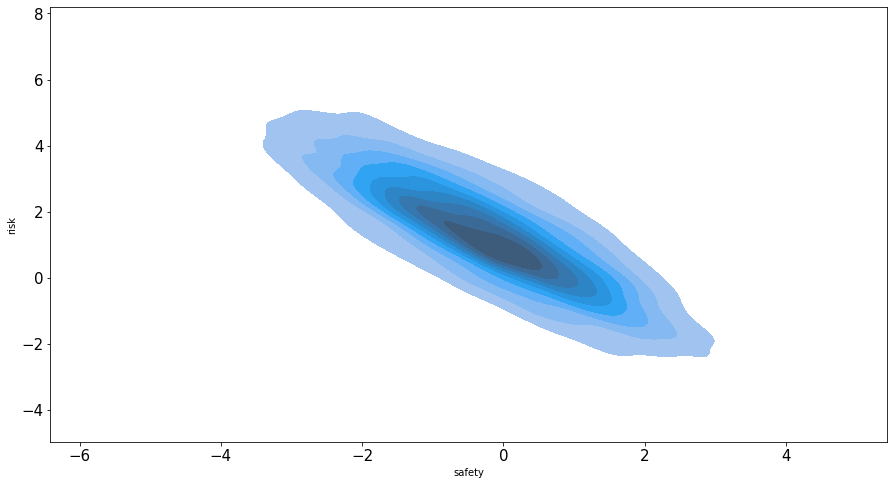

In [66]:
sns.kdeplot(
    data=data["safety"],
    data2=data["risk"],
    fill=True
);

In [67]:
r, p_value = pearsonr(data['safety'], data['risk'])
r, p_value

(-0.8394868557134285, 0.0)

In [68]:
r, p_value = pearsonr(data['ability'], data['risk'])
r, p_value

(-0.3671078930824824, 1.15376907e-316)

In [69]:
r, p_value = pearsonr(data['ability'], data['safety'])
r, p_value

(0.012058538854629184, 0.22791506499711695)

# Decomposed combined

(16, 100, 35.0023, 13.449776753165832, 10000)

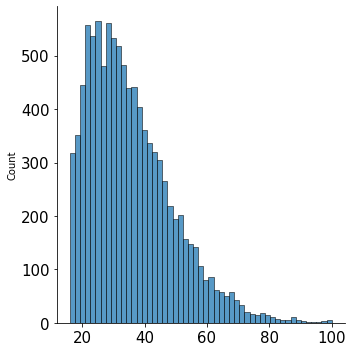

In [70]:
age_mean = 18
age_std = 22

x = skewnorm.rvs(a=8, loc=age_mean, scale=age_std, size=n_samples)
# hard clip leaves us with non constant amout of samples
# x = x[(x > 16) & (x < 100)] 
x = np.clip(x, a_min=16, a_max=100)
sns.displot(x);
x = x.astype(int)
age_skewed_mean = x.mean()
age_skewed_std = x.std()

x.min(), x.max(), age_skewed_mean, age_skewed_std, len(x)

In [71]:
# can be changed over time in favor of the car
# driver is overall more important than car
driver_weight = 4

risk_model = StructuralCausalModel({
    "training": lambda n_samples: np.random.binomial(1, p=0.20, size=n_samples), 
#     "age": lambda n_samples: np.clip(skewnorm.rvs(a=16, loc=age_mean, scale=age_std, size=n_samples), a_min=16, a_max=100).astype(int),
    "age": lambda n_samples: np.clip(skewnorm.rvs(a=16, loc=age_mean, scale=age_std, size=n_samples), a_min=16, a_max=100),
    "driver_ability": \
        lambda training, age, n_samples: 
            np.random.normal(loc=training - \
                             # all deviation from good age is negative
                             # using unskwed mean makes this a bit more balanaced
                             abs(age - age_skewed_mean) / age_std, \
                             scale=0.1),
    "emergency_breaking": lambda n_samples: np.random.binomial(1, p=0.60, size=n_samples), 
    "braking_distance": lambda n_samples: np.random.normal(loc=braking_distance_mean, scale=braking_distance_std, size=n_samples),
    "power": lambda n_samples: skewnorm.rvs(a=2, loc=power_mean, scale=power_std, size=n_samples),
    "car_safety": \
        lambda emergency_breaking, braking_distance, power, n_samples: \
            np.random.normal(loc=emergency_breaking - \
                             # having a breaking distance below average is negative, so we have to subtract
                             (braking_distance - braking_distance_mean) / braking_distance_std - \
                             # all deviation from good amount of power is negative
                             abs(power - power_mean) / power_std, \
                             scale=0.1),
    "miles": lambda n_samples: skewnorm.rvs(a=4, loc=miles_mean, scale=miles_std, size=n_samples),
    "risk": \
        lambda driver_ability, car_safety, miles, n_samples:
                # negative score is high risk
                # driver is overall more important than car
             - np.random.normal(loc=\
                             driver_ability * driver_weight\
                             + car_safety
                             # all deviation from good miles is negative
                             - abs(miles - miles_mean) / miles_std, \
                             scale=0.1)})

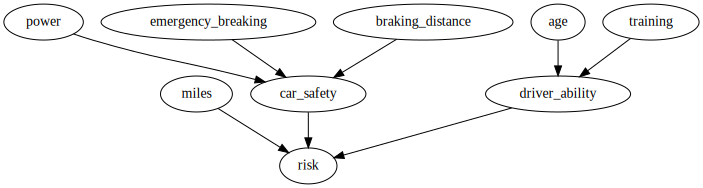

In [72]:
risk_model.cgm.draw()

In [73]:
# n_samples=10_000
n_samples=1_500
data = risk_model.sample(n_samples=n_samples)
data.head()

,training,age,emergency_breaking,braking_distance,power,miles,driver_ability,car_safety,risk
0,0,22.074999,0,44.141387,113.668946,62.736076,-0.700455,-1.070717,5.430059
1,0,64.670800,1,40.314927,81.336842,21.936968,-1.462450,0.565342,5.359291
2,0,47.801920,1,34.953504,90.562338,37.238561,-0.636300,1.869731,1.036012
3,0,24.979361,1,33.086800,165.367007,16.682854,-0.644393,1.141447,1.575384
4,0,31.542704,1,45.957213,48.874957,36.650654,-0.069673,-1.128143,2.133207


In [74]:
data.describe()

,training,age,emergency_breaking,braking_distance,power,miles,driver_ability,car_safety,risk
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.196667,35.784061,0.610667,39.927919,135.924057,44.628843,-0.273410,-0.179391,2.087556
std,0.397611,13.062148,0.487762,5.105963,35.198172,16.314028,0.539135,1.265627,2.595190
min,0.000000,16.000000,0.000000,25.722438,40.479303,11.050423,-2.474381,-5.324880,-6.257168
25%,0.000000,25.427735,0.000000,36.381188,111.093360,32.882722,-0.598663,-1.015400,0.633875
50%,0.000000,33.595436,1.000000,39.802977,133.575313,42.151016,-0.314902,-0.125165,2.186350
75%,0.000000,43.326458,1.000000,43.379420,157.735429,53.767457,-0.052595,0.670727,3.717575
max,1.000000,90.845728,1.000000,56.124640,287.119777,117.151155,1.182688,3.204689,13.377959


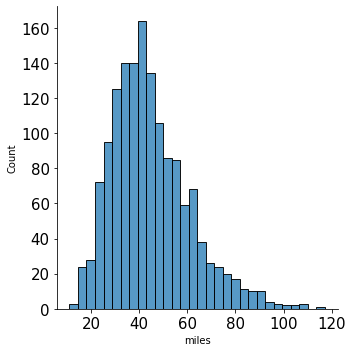

In [75]:
sns.displot(data["miles"]);

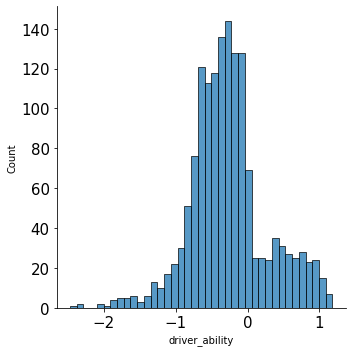

In [76]:
sns.displot(data["driver_ability"]);

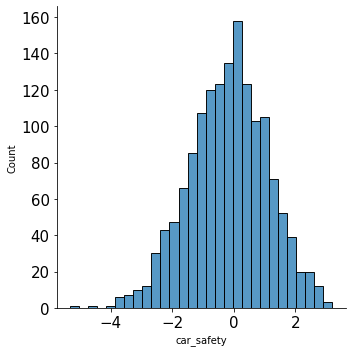

In [77]:
sns.displot(data["car_safety"]);

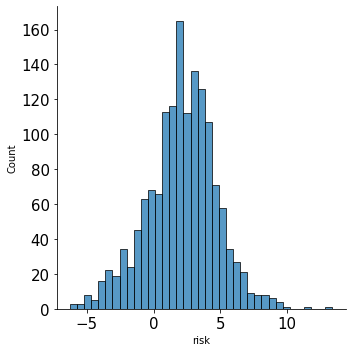

In [78]:
sns.displot(data["risk"]);

In [79]:
# sns.kdeplot?

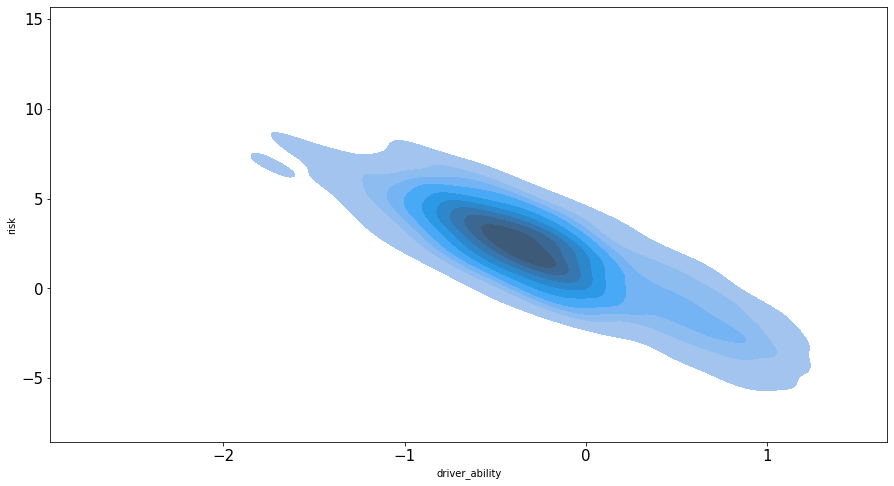

In [80]:
sns.kdeplot(
    data=data["driver_ability"],
    data2=data["risk"],
    fill=True
);

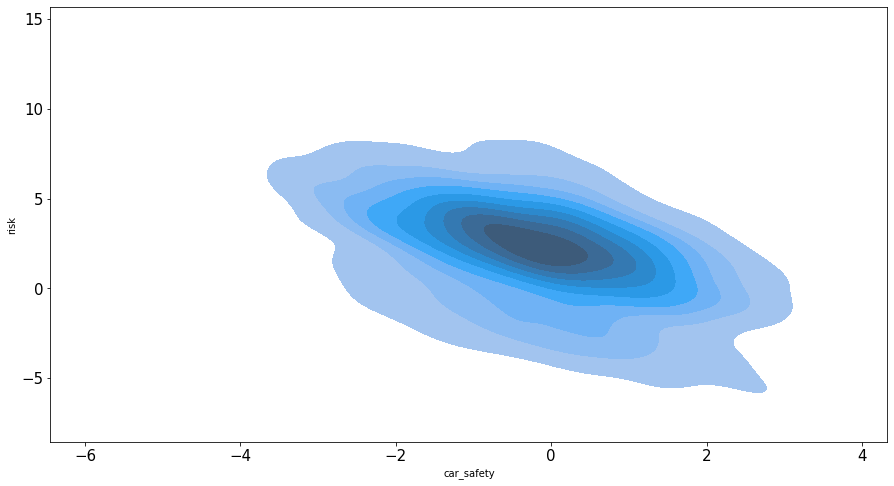

In [81]:
sns.kdeplot(
    data=data["car_safety"],
    data2=data["risk"],
    fill=True
);

In [82]:
r, p_value = pearsonr(data['car_safety'], data['risk'])
r, p_value

(-0.4914286110619363, 5.100208579490695e-92)

In [83]:
r, p_value = pearsonr(data['driver_ability'], data['risk'])
r, p_value

(-0.8391752857812096, 0.0)

In [84]:
r, p_value = pearsonr(data['driver_ability'], data['car_safety'])
r, p_value

(0.0059074384542549185, 0.8191756525961663)

In [85]:
data.head()

,training,age,emergency_breaking,braking_distance,power,miles,driver_ability,car_safety,risk
0,0,22.074999,0,44.141387,113.668946,62.736076,-0.700455,-1.070717,5.430059
1,0,64.670800,1,40.314927,81.336842,21.936968,-1.462450,0.565342,5.359291
2,0,47.801920,1,34.953504,90.562338,37.238561,-0.636300,1.869731,1.036012
3,0,24.979361,1,33.086800,165.367007,16.682854,-0.644393,1.141447,1.575384
4,0,31.542704,1,45.957213,48.874957,36.650654,-0.069673,-1.128143,2.133207


In [86]:
GREEN = 2
YELLOW = 1
RED = 0

In [87]:
features = ['training', 'age', 'emergency_breaking', 'braking_distance', 'power', 'miles', 'risk']

In [88]:
# preprocessed_data = data[['driver_ability', 'car_safety', 'miles', 'risk']]
preprocessed_data = data[features]
# preprocessed_data = data.copy()
preprocessed_data['risk'] = normalize(preprocessed_data['risk'].values.reshape(-1, 1), axis=0, norm='max')
preprocessed_data['group_name'] = 'medium'
preprocessed_data['group'] = YELLOW
preprocessed_data.head()

,training,age,emergency_breaking,braking_distance,power,miles,risk,group_name,group
0,0,22.074999,0,44.141387,113.668946,62.736076,0.405896,medium,1
1,0,64.670800,1,40.314927,81.336842,21.936968,0.400606,medium,1
2,0,47.801920,1,34.953504,90.562338,37.238561,0.077442,medium,1
3,0,24.979361,1,33.086800,165.367007,16.682854,0.117760,medium,1
4,0,31.542704,1,45.957213,48.874957,36.650654,0.159457,medium,1


In [89]:
preprocessed_data.describe()

,training,age,emergency_breaking,braking_distance,power,miles,risk,group
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.0
mean,0.196667,35.784061,0.610667,39.927919,135.924057,44.628843,0.156044,1.0
std,0.397611,13.062148,0.487762,5.105963,35.198172,16.314028,0.193990,0.0
min,0.000000,16.000000,0.000000,25.722438,40.479303,11.050423,-0.467722,1.0
25%,0.000000,25.427735,0.000000,36.381188,111.093360,32.882722,0.047382,1.0
50%,0.000000,33.595436,1.000000,39.802977,133.575313,42.151016,0.163429,1.0
75%,0.000000,43.326458,1.000000,43.379420,157.735429,53.767457,0.277888,1.0
max,1.000000,90.845728,1.000000,56.124640,287.119777,117.151155,1.000000,1.0


In [90]:
# balanced? imbalanced?
low_risk_threshold = preprocessed_data['risk'].quantile(.45)
# low_risk_threshold = preprocessed_data['risk'].quantile(.4)
# low_risk_threshold = preprocessed_data['risk'].quantile(.35)
# low_risk_threshold = preprocessed_data['risk'].quantile(.3333)
# low_risk_threshold = preprocessed_data['risk'].quantile(.50)
low_risk_threshold

0.1429360077123073

In [91]:
# high_risk_threshold = preprocessed_data['risk'].quantile(.6)
# high_risk_threshold = preprocessed_data['risk'].quantile(.65)
# high_risk_threshold = preprocessed_data['risk'].quantile(.6666)
high_risk_threshold = preprocessed_data['risk'].quantile(.55)
# high_risk_threshold = preprocessed_data['risk'].quantile(.75)
high_risk_threshold

0.18709507052555924

In [92]:
preprocessed_data['group_name'] = np.where(preprocessed_data['risk'] < low_risk_threshold, 'low', preprocessed_data['group_name'])

In [93]:
preprocessed_data['group_name'] = np.where(preprocessed_data['risk'] > high_risk_threshold, 'high', preprocessed_data['group_name'])

In [94]:
np.unique(preprocessed_data['group_name'], return_counts=True)

(array(['high', 'low', 'medium'], dtype=object), array([675, 675, 150]))

In [95]:
preprocessed_data['group'] = np.where(preprocessed_data['group_name'] == 'low', GREEN, preprocessed_data['group'])

In [96]:
preprocessed_data['group'] = np.where(preprocessed_data['group_name'] == 'high', RED, preprocessed_data['group'])

In [97]:
preprocessed_data.head(10)

,training,age,emergency_breaking,braking_distance,power,miles,risk,group_name,group
0,0,22.074999,0,44.141387,113.668946,62.736076,0.405896,high,0
1,0,64.670800,1,40.314927,81.336842,21.936968,0.400606,high,0
2,0,47.801920,1,34.953504,90.562338,37.238561,0.077442,low,2
3,0,24.979361,1,33.086800,165.367007,16.682854,0.117760,low,2
4,0,31.542704,1,45.957213,48.874957,36.650654,0.159457,medium,1
5,0,43.109112,0,39.618949,124.399279,41.050092,0.164909,medium,1
6,0,17.192214,1,38.649002,98.608717,35.197500,0.170213,medium,1
7,1,53.068784,0,41.515324,209.751916,67.413810,0.271742,high,0
8,0,24.916985,0,41.884055,151.503860,31.267354,0.237374,high,0
9,0,42.569559,0,44.181962,165.343418,49.476330,0.342289,high,0


In [98]:
preprocessed_data.describe()

,training,age,emergency_breaking,braking_distance,power,miles,risk,group
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000
mean,0.196667,35.784061,0.610667,39.927919,135.924057,44.628843,0.156044,1.000
std,0.397611,13.062148,0.487762,5.105963,35.198172,16.314028,0.193990,0.949
min,0.000000,16.000000,0.000000,25.722438,40.479303,11.050423,-0.467722,0.000
25%,0.000000,25.427735,0.000000,36.381188,111.093360,32.882722,0.047382,0.000
50%,0.000000,33.595436,1.000000,39.802977,133.575313,42.151016,0.163429,1.000
75%,0.000000,43.326458,1.000000,43.379420,157.735429,53.767457,0.277888,2.000
max,1.000000,90.845728,1.000000,56.124640,287.119777,117.151155,1.000000,2.000


In [99]:
labels = ["High Risk", "Medium Risk", "Low Risk"]
markers = ['v', 'd', '^']
# colors = ['#FF8080', '#FFFF80', '#8080FF']
colors = ['#FF0000', '#FFFF00', '#0000FF']

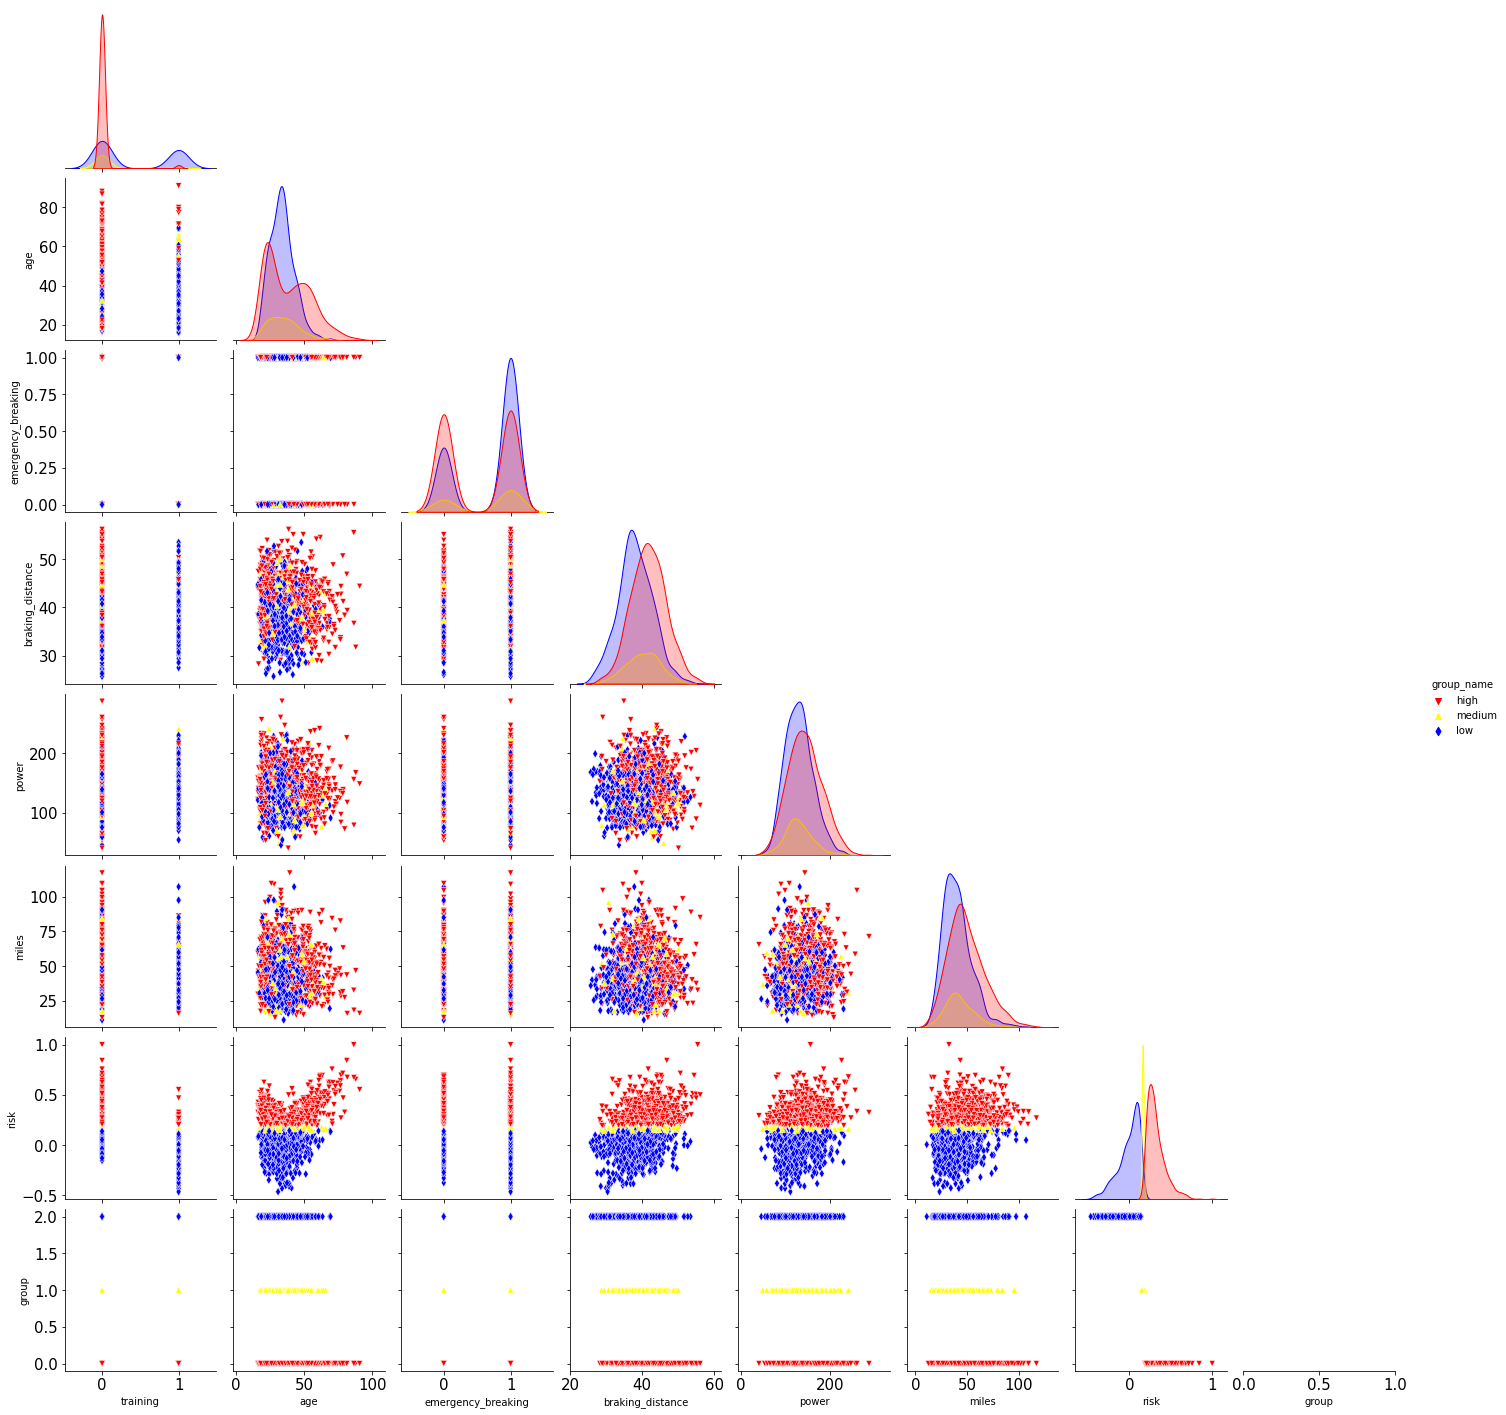

In [100]:
# https://seaborn.pydata.org/generated/seaborn.pairplot.html

# sns.pairplot(preprocessed_data, hue='group',  kind="kde";
 
sns.pairplot(preprocessed_data, 
             kind="scatter", 
             diag_kind="kde",
             corner=True, 
             hue='group_name',
             hue_order = ['high', 'medium', 'low'],
             palette=colors, 
             markers=markers);


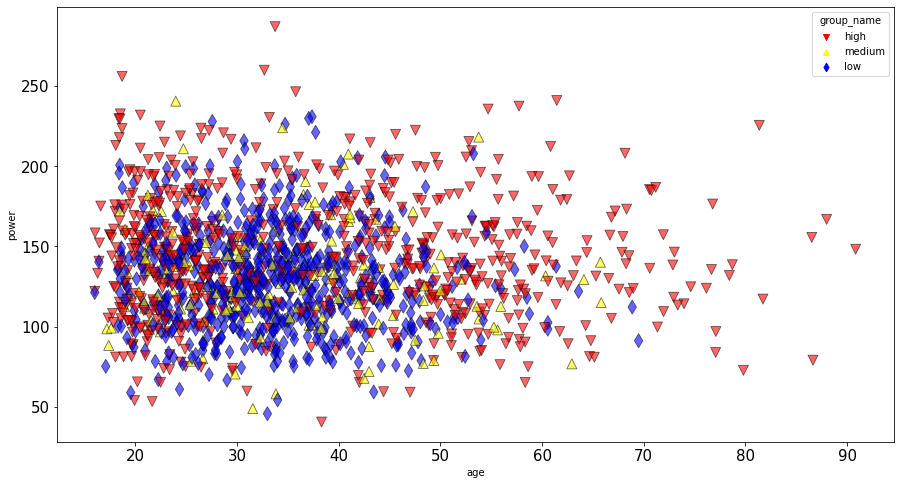

In [101]:
sns.scatterplot(preprocessed_data['age'], 
                preprocessed_data['power'], 
                hue=preprocessed_data['group_name'], 
                hue_order = ['high', 'medium', 'low'],
                palette=colors,  
                style=preprocessed_data['group_name'], 
                markers=markers,
                s=100,
                edgecolor='k',
                alpha=0.6
               );

In [102]:
file_name = './model-based-1.csv'
preprocessed_data.to_csv(file_name, index=False, sep=';')

In [103]:
!ls -l

total 2672
-rw-r--r-- 1 olli olli   90353 Jul 22 13:27 generate-causal.ipynb
-rw-r--r-- 1 olli olli 2101079 Jul 20 14:02 generate.ipynb
-rw-r--r-- 1 olli olli   54500 May  9 12:33 insurance-customers-risk-1500-shift.csv
-rw-r--r-- 1 olli olli   54435 May  9 12:33 insurance-customers-risk-1500-test.csv
-rw-r--r-- 1 olli olli   54421 Jul 22 13:21 insurance-customers-risk-1500.csv
-rw-r--r-- 1 olli olli  156211 Jul 22 13:28 model-based-1.csv
-rw-r--r-- 1 olli olli  177561 Jul 22 13:27 stats-basics.ipynb
-rw-r--r-- 1 olli olli   28306 Jul 21 16:31 stats-causal.ipynb


In [104]:
customers = pd.read_csv(file_name, sep=';')
customers.describe()

,training,age,emergency_breaking,braking_distance,power,miles,risk,group
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000
mean,0.196667,35.784061,0.610667,39.927919,135.924057,44.628843,0.156044,1.000
std,0.397611,13.062148,0.487762,5.105963,35.198172,16.314028,0.193990,0.949
min,0.000000,16.000000,0.000000,25.722438,40.479303,11.050423,-0.467722,0.000
25%,0.000000,25.427735,0.000000,36.381188,111.093360,32.882722,0.047382,0.000
50%,0.000000,33.595436,1.000000,39.802977,133.575313,42.151016,0.163429,1.000
75%,0.000000,43.326458,1.000000,43.379420,157.735429,53.767457,0.277888,2.000
max,1.000000,90.845728,1.000000,56.124640,287.119777,117.151155,1.000000,2.000
